In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import glob

loss_dfs = sorted(glob.glob("../../data/results/*_losses.csv"))

loss_dfs

['../../data/results\\100_cross-sectional_None_0.01_losses.csv',
 '../../data/results\\100_cross-sectional_None_0.5_losses.csv',
 '../../data/results\\100_cross-sectional_None_1_losses.csv',
 '../../data/results\\100_cross-sectional_time_0.01_losses.csv',
 '../../data/results\\100_cross-sectional_time_0.5_losses.csv',
 '../../data/results\\100_cross-sectional_time_1_losses.csv',
 '../../data/results\\100_time_None_0.01_losses.csv',
 '../../data/results\\100_time_None_0.5_losses.csv',
 '../../data/results\\100_time_None_1_losses.csv',
 '../../data/results\\100_time_cross-sectional_0.01_losses.csv',
 '../../data/results\\100_time_cross-sectional_0.5_losses.csv',
 '../../data/results\\100_time_cross-sectional_1_losses.csv']

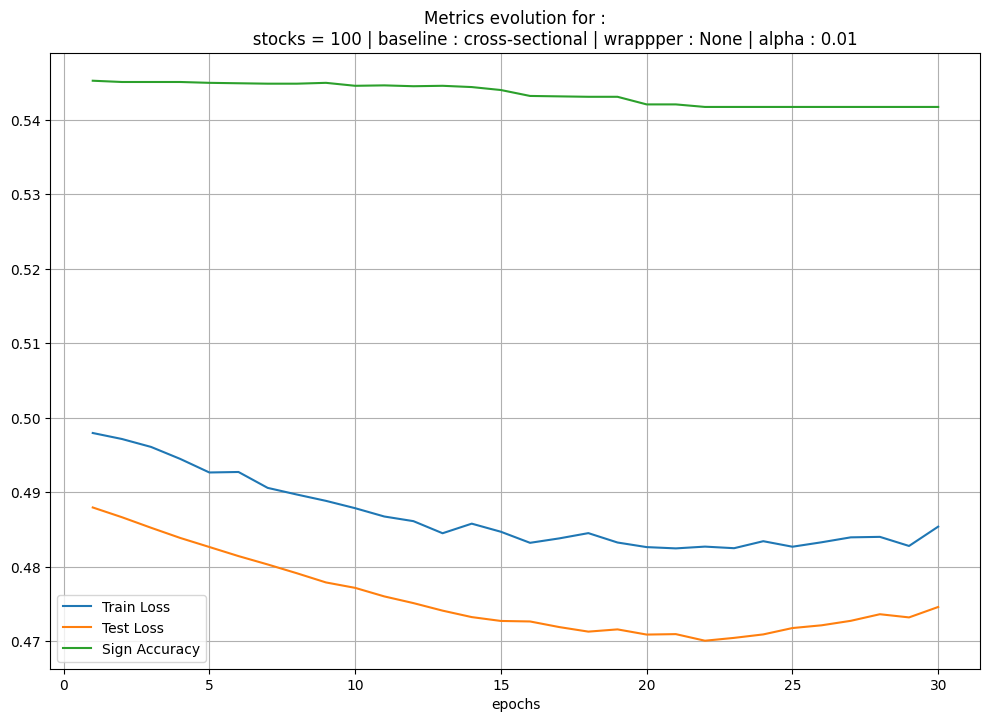

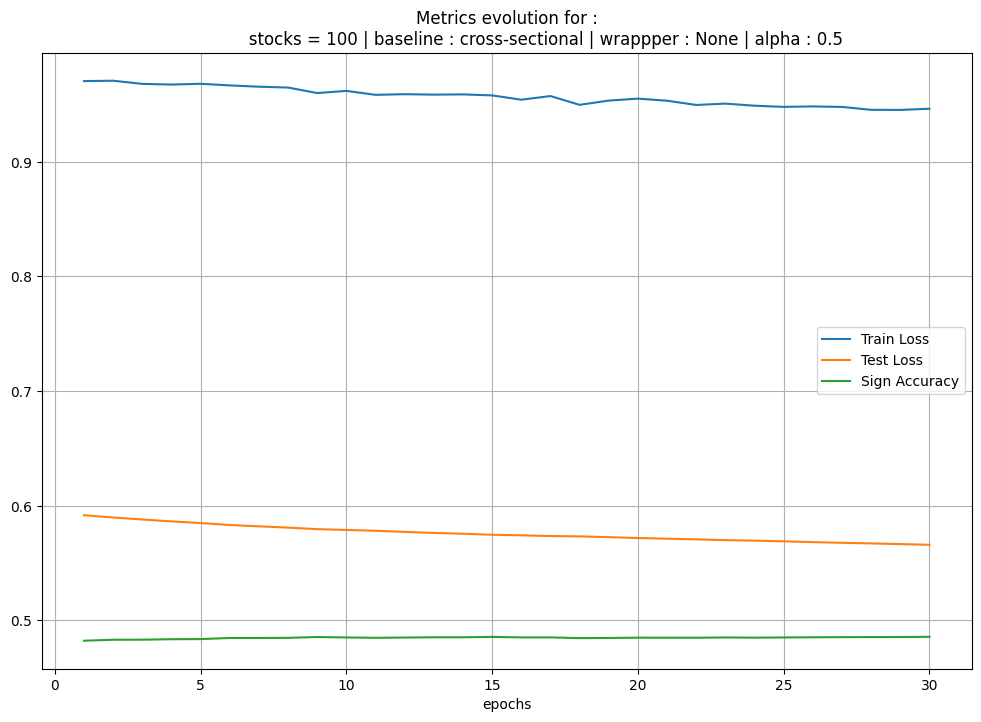

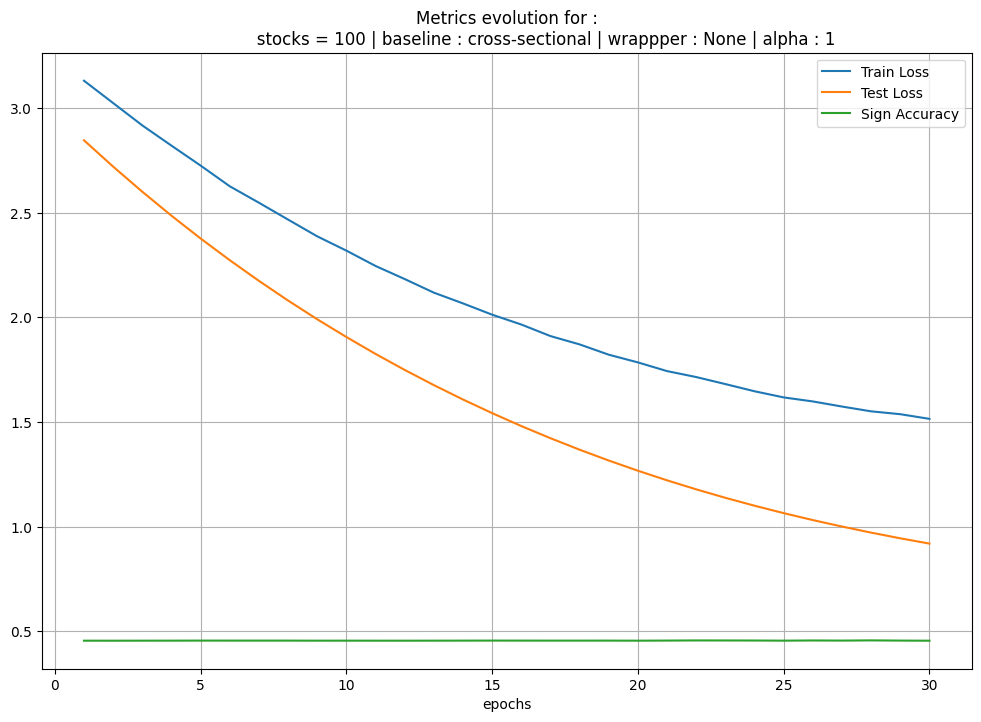

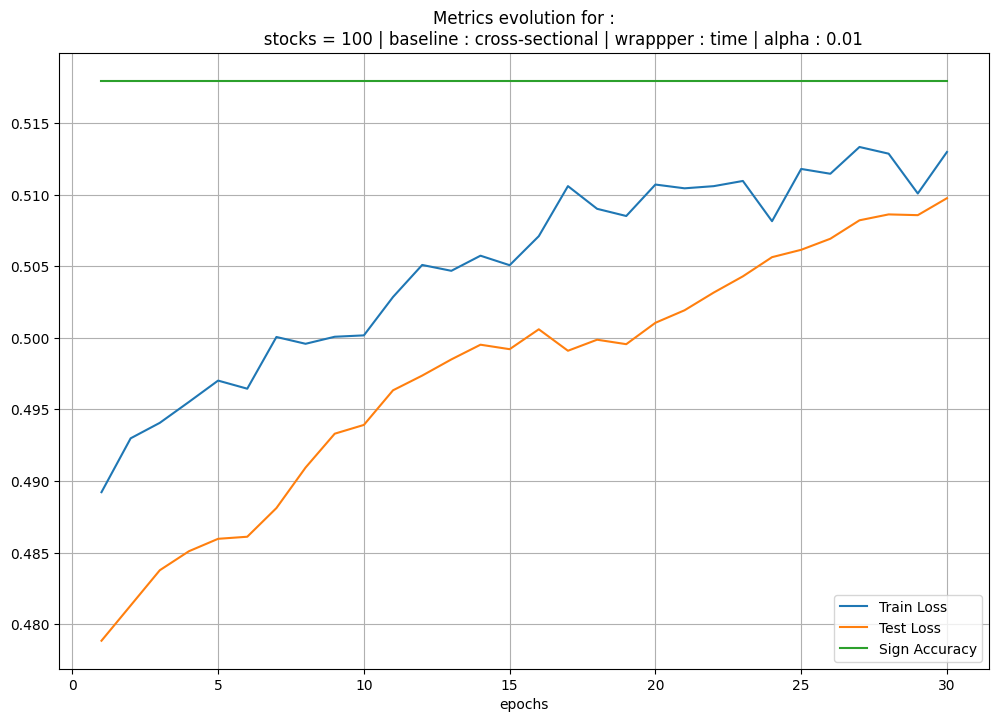

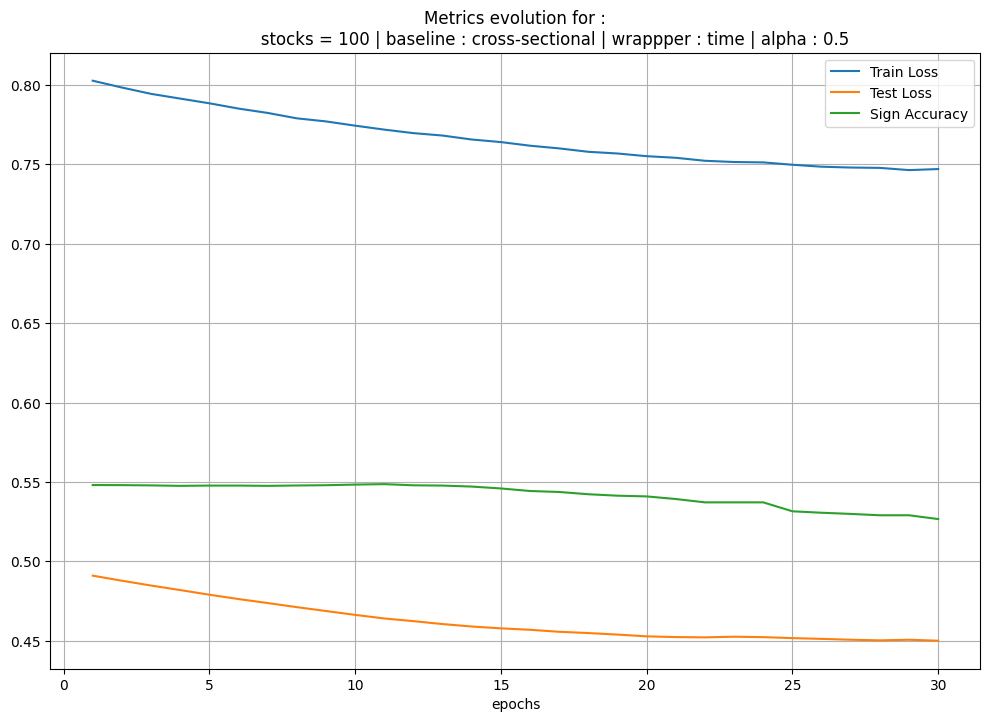

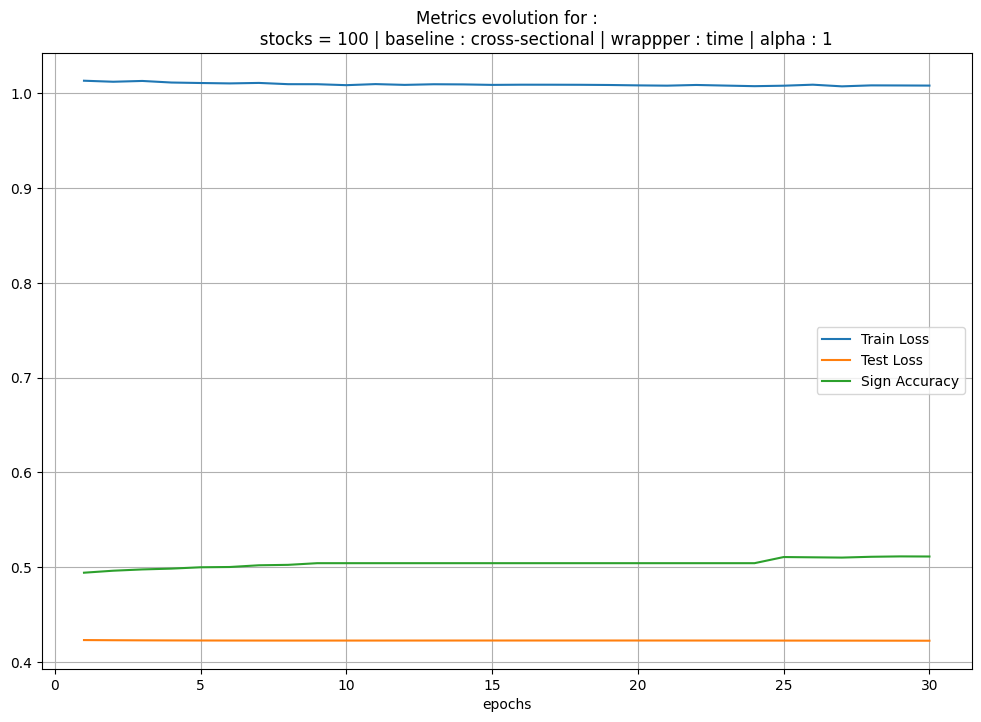

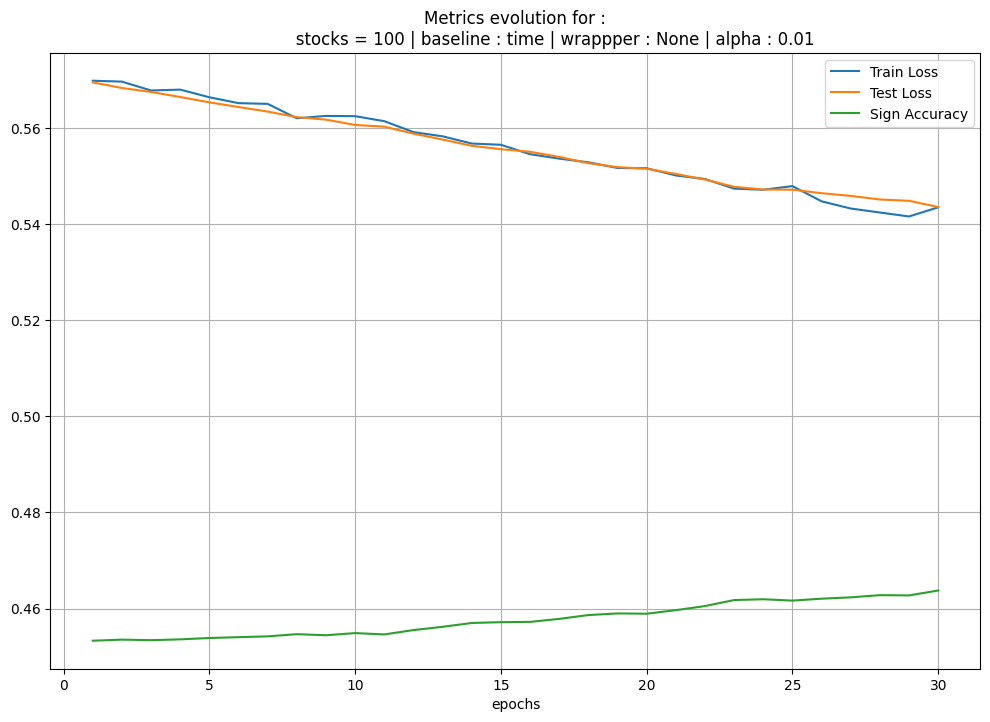

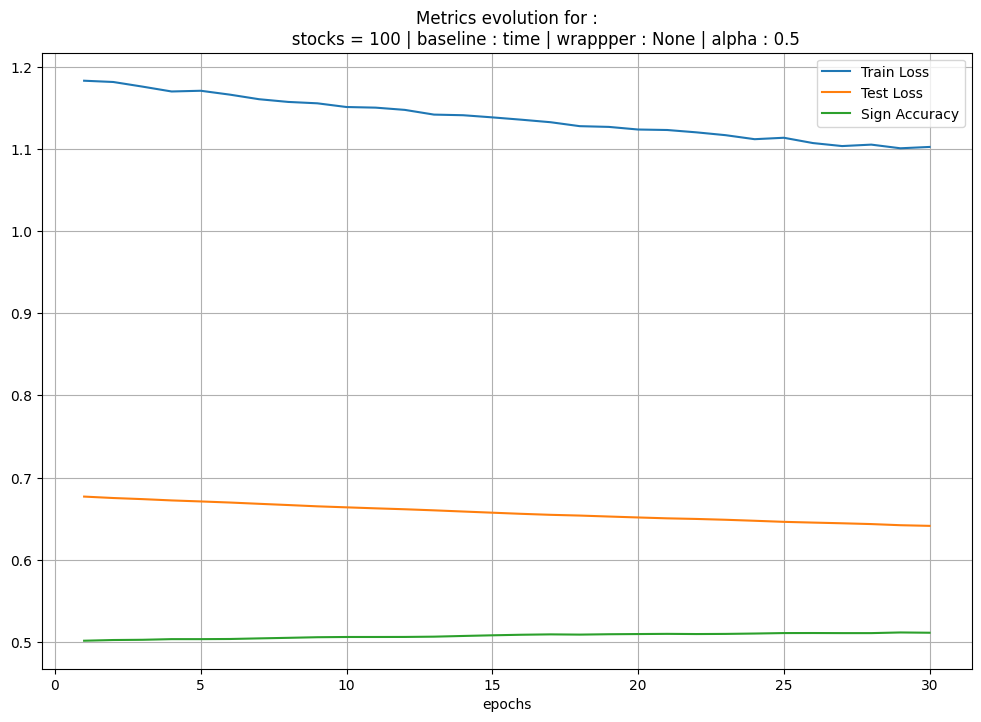

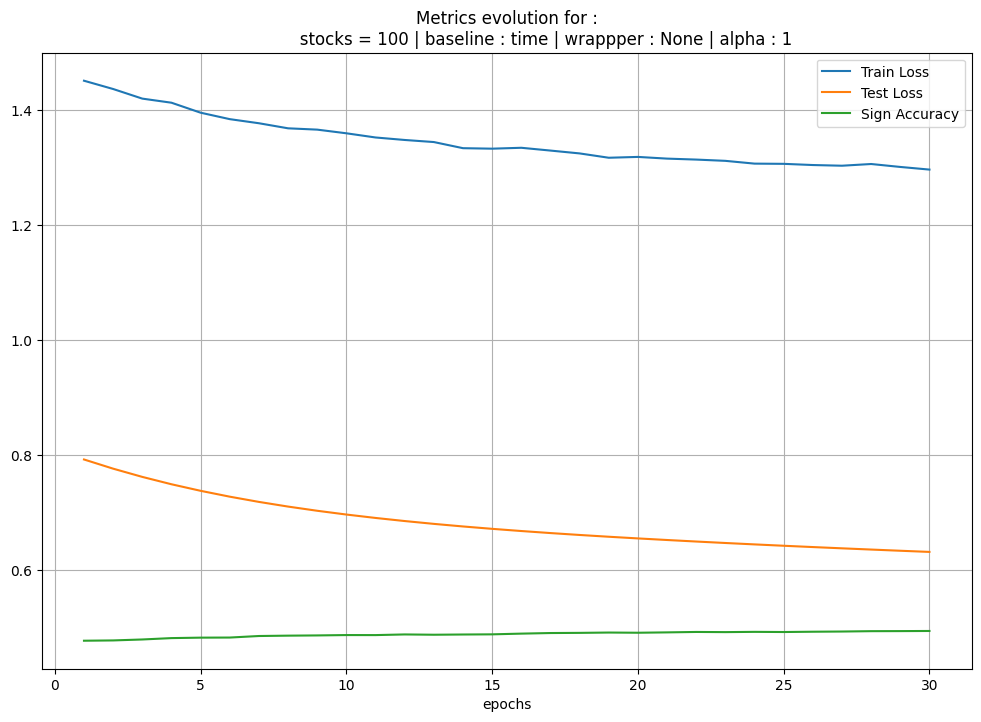

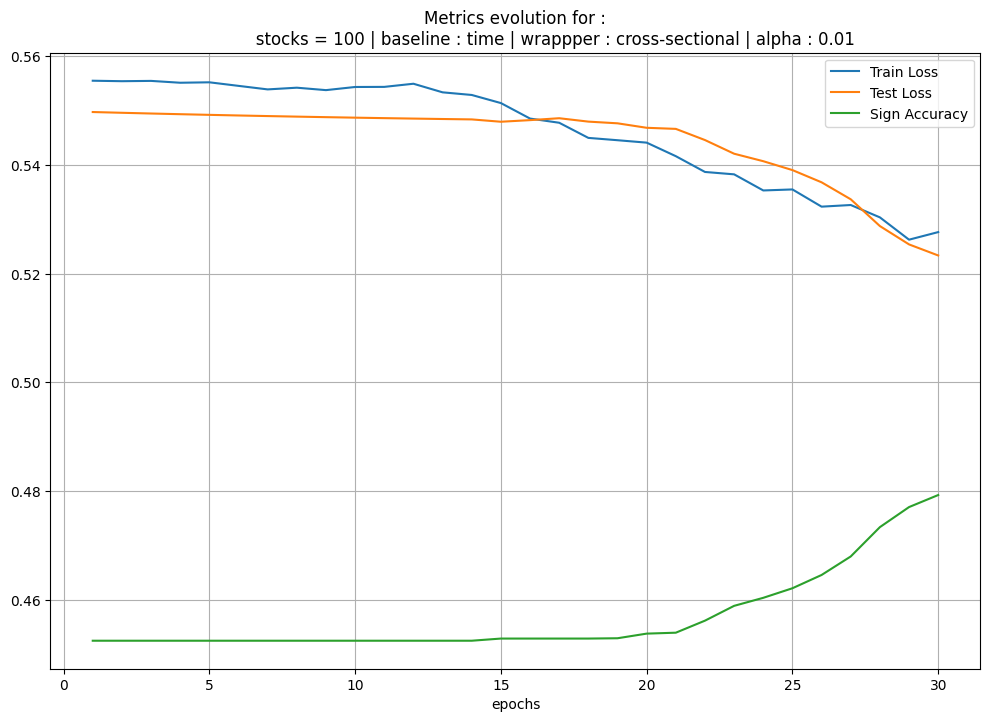

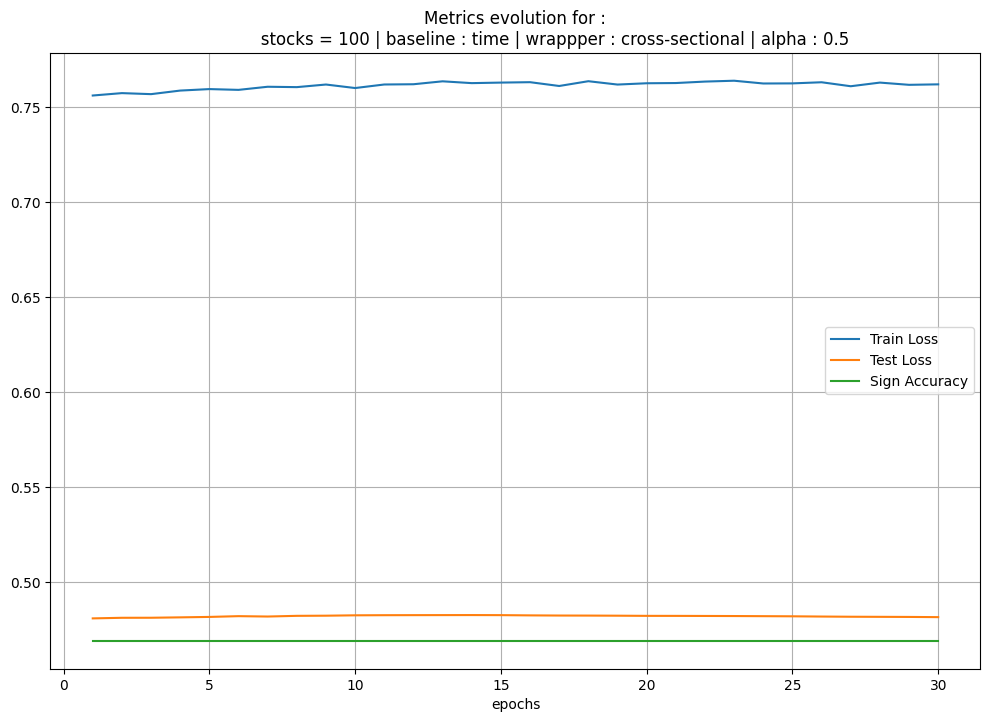

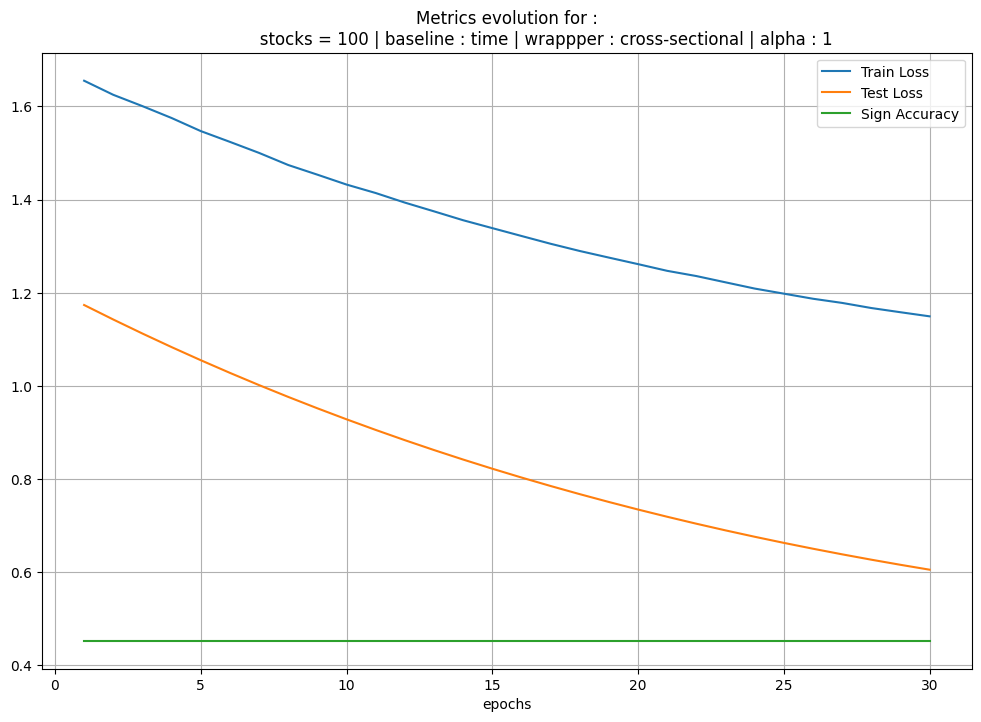

In [37]:
for fn in loss_dfs:
    exp =fn.strip("../dataresultlosses.csv\\")
    experiment = exp.split("_")

    dfl = pd.read_csv(fn)
    dfl["epochs"] = dfl["Unnamed: 0"] + 1
    dfl.drop(columns="Unnamed: 0", inplace= True)

    plt.figure(figsize=(12, 8))
    sns.lineplot(data = dfl, x = "epochs", y = "train", label = "Train Loss")
    sns.lineplot(data = dfl, x = "epochs", y = "test", label = "Test Loss")
    sns.lineplot(data = dfl, x = "epochs", y = "acc", label = "Sign Accuracy")
    plt.grid()
    plt.title(f"""Metrics evolution for :
               stocks = {experiment[0]} | baseline : {experiment[1]} | wrappper : {experiment[2]} | alpha : {experiment[3]}""")
    plt.ylabel("")
    plt.legend()
    plt.savefig(f"../../data/results/figures/{exp}_lossgraph.png")

    plt.show()
